In [34]:
from mmdet.apis import init_detector, inference_detector, show_result_pyplot
import mmcv

In [35]:
config_file = 'configs/vfnet/vf_101.py'
# download the checkpoint from model zoo and put it in `checkpoints/`
# url: https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth
checkpoint_file = 'work_dirs/1_vf_101/latest.pth'

In [36]:
# build the model from a config file and a checkpoint file
model = init_detector(config_file, checkpoint_file, device='cuda:0')

Use load_from_local loader


In [41]:
# test a single image
img = 'data/coco/test/test10004.jpg'
result = inference_detector(model, img)

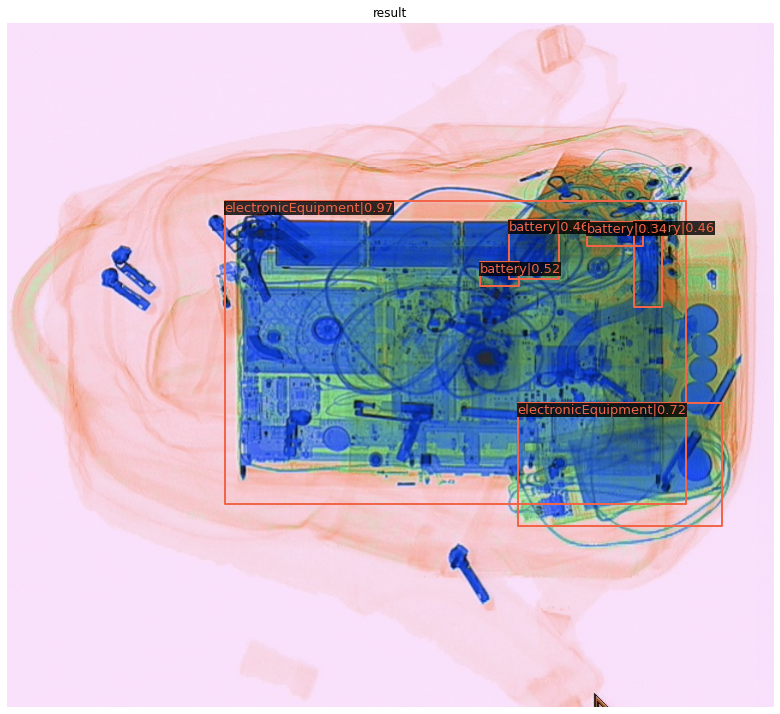

In [42]:
# show the results
show_result_pyplot(model, img, result)

In [ ]:
!python label_visualization.py --datasets COCO --img_path data/coco/train/ --label_path data/coco/annotations/coco1.json --cls_list_file ./xf.names

In [ ]:
!conda list

In [ ]:
!python tools/analysis_tools/analyze_logs.py plot_curve work_dirs/cascade_rcnn_r50_fpn_1x_coco/20210707_202839.log.json --keys s0.loss_cls s0.loss_bbox --out losses.pdf

In [23]:
!python tools/analysis_tools/analyze_logs.py plot_curve work_dirs/1_vf/20210710_031414.log.json --keys bbox_mAP --out map11vfn.jpg

Traceback (most recent call last):
  File "tools/analysis_tools/analyze_logs.py", line 5, in <module>
    import matplotlib.pyplot as plt
  File "/opt/conda/envs/JupyterSystemEnv/lib/python3.6/site-packages/matplotlib/pyplot.py", line 115, in <module>
    _backend_mod, new_figure_manager, draw_if_interactive, _show = pylab_setup()
  File "/opt/conda/envs/JupyterSystemEnv/lib/python3.6/site-packages/matplotlib/backends/__init__.py", line 62, in pylab_setup
    [backend_name], 0)
ModuleNotFoundError: No module named 'matplotlib_inline'


In [ ]:
python tools/train.py configs/cascade_rcnn/cascade_rcnn_r50_fpn_1x_coco.py --work-dir ./work_dirs/2
python infer.py
python DataTransformer.py


In [ ]:
python tools/train.py configs/dcn/cascade_rcnn_r50_fpn_dconv_c3-c5_1x_coco.py --work-dir ./work_dirs/4_dcn
anchor:0.38, 0.52, 0.75, 0.92, 1.28, 1.69

In [ ]:
python tools/train.py configs/cascade_rcnn/cascade_rcnn_x101_32x4d_fpn_1x_coco.py --work-dir ./work_dirs/3
./tools/dist_train.sh configs/dcn/cascade_rcnn_r50_fpn_dconv_c3-c5_1x_coco.py 2 --work-dir ./work_dirs/6_dcn_OHEM

In [ ]:

export CUDA_VISIBLE_DEVICES=0,1
python tools/train.py configs/vfnet/cossume_vfnet.py --work-dir ./work_dirs/2_vf
python tools/train.py work_dirs/cbnet.py --work-dir ./work_dirs/1_cbnet
python tools/train.py configs/vfnet/my_vfnet.py --work-dir ./work_dirs/vf_1603 --seed 2021 --deterministic
python tools/train.py work_dirs/cascade_mix/cascade_rcnn_ohem.py
python tools/train.py work_dirs/vf_R2101-41-swa.py


In [ ]:
bash ./tools/dist_train.sh \
    configs/vfnet/DRS_vfnet.py \
    2 \
    --seed 2021 \
    --deterministic


cascade_rcnn_r50_rfp_1x_coco.py
bash ./tools/dist_train.sh \
    configs/detectors/detectors_cascade.py \
    2 \
    --seed 2021 \
    --deterministic


faster_rcnn_r50_fpn_ohem_1x_coco
bash ./tools/dist_train.sh \
    configs/cascade_rcnn/cascade_rcnn_ohem.py \
    2 \
    --seed 2021 \
    --deterministic

In [ ]:
python tools/analysis_tools/analyze_logs.py plot_curve work_dirs/1_vf/20210710_031414.log.json \
                                            --keys bbox_mAP \
                                            --out map11vfn.jpg

python tools/test.py \
       work_dirs/detectors_cascade_rcnn_r50_1x_coco/detectors_cascade.py \
       work_dirs/detectors_cascade_rcnn_r50_1x_coco/epoch_18.pth \
       --format-only \
       --options "jsonfile_prefix=./results"

python tools/analysis_tools/coco_error_analysis.py \
       results.bbox.json \
       vision_results \
       --ann=data/coco/annotations/coco_val.json

python tools/test.py \
    work_dirs/vf_R2101.py \
    work_dirs/2_vf_R2101/latest.pth \
    --format-only \
    --options "jsonfile_prefix=./vfnet_test_R2101"
python tools/misc/browse_dataset.py configs/vfnet/vf_101.py \
                                    --output-dir vis_test
bash ./tools/dist_train.sh \
    configs/vfnet/vf_101.py \
    2 

bash ./tools/dist_train.sh \
    work_dirs/vf_R2101.py \
    2 

In [ ]:
python swa.py --model_dir work_dirs/3_vf_R2101_swa --starting_model_id 1 --ending_model_id 12 --save_dir swa_model
python swa.py --model_dir work_dirs/vfX_swa --save_dir work_dirs/swa_model

In [1]:
!nvidia-smi
coscmd upload mmdetection mmlab/
rm -rf mmdetection/data

Mon Jul 19 08:54:55 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  On   | 00000000:00:08.0 Off |                    0 |
| N/A   54C    P0   254W / 300W |   4357MiB / 32480MiB |     68%      Default |
+-------------------------------+----------------------+----------------------+
|   1  Tesla V100-SXM2...  On   | 00000000:00:09.0 Off |                    0 |
| N/A   55C    P0   216W / 300W |   2955MiB / 32480MiB |     36%      Default |
+-------------------------------+----------------------+----------------------+
        

In [ ]:
python tools/test.py \
    work_dirs/vf_R2101-41.py \
    work_dirs/swa_model/swa_1-12.pth \
    --format-only \
    --options "jsonfile_prefix=./vfnet_swa_R2"

configs/hrnet/cascade_rcnn_hrnetv2p_w18_20e_coco.py
python tools/train.py work_dirs/vf_R2101-41-swa.py
python tools/train.py work_dirs/cascade_rcnn_hrnetv2p_w18_20e_coco.py

In [ ]:
echo $http_proxy
echo $https_proxy
git config --global http.proxy http://10.174.148.31:3928
git config --global https.proxy https://10.174.148.31:3928
